In [9]:
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt
from PIL import Image
import re
import numpy as np

In [4]:
ff1.Cache.enable_cache('../cache')
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [62]:
session = fastf1.get_session(2023, 'miami', 'R')
session.load(telemetry=False, weather=False)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.0]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for 

In [63]:
plot_width = 12.0
plot_height = 6.9
plot_size = [plot_width, plot_height]
title_font_size = int(2.5 * plot_height)  # Adjust the 0.15 multiplier to your liking
axis_label_font_size = int(1.5 * plot_height)  # Adjust the 0.1 multiplier to your liking
autolayout = True
plot_title = f"Position Changes during the\n {session.event['EventName']} {session.event.year}"
plot_filename = re.sub(r'\W+', '', plot_title.replace("\n", " ")) + ".png"
logo_path = '../RCKMG_logo.png'
logo_img = Image.open(logo_path)
def add_logo():
    # Define the new width and height for the logo
    new_width = 35
    new_height = 35
    # Resize the logo
    logo_resized = logo_img.resize((new_width, new_height))
    logo_resized_np = np.array(logo_resized)
    logo_x = 10
    logo_y = 250
    fig.figimage(logo_resized_np, xo=logo_x, yo=logo_y, zorder=1, origin='upper', alpha=1)
def are_drivers_same_team(drv1, drv2, session):
    drv1_team = session.laps.pick_driver(drv1)["Team"].iloc[0]
    drv2_team = session.laps.pick_driver(drv2)["Team"].iloc[0]
    return drv1_team == drv2_team

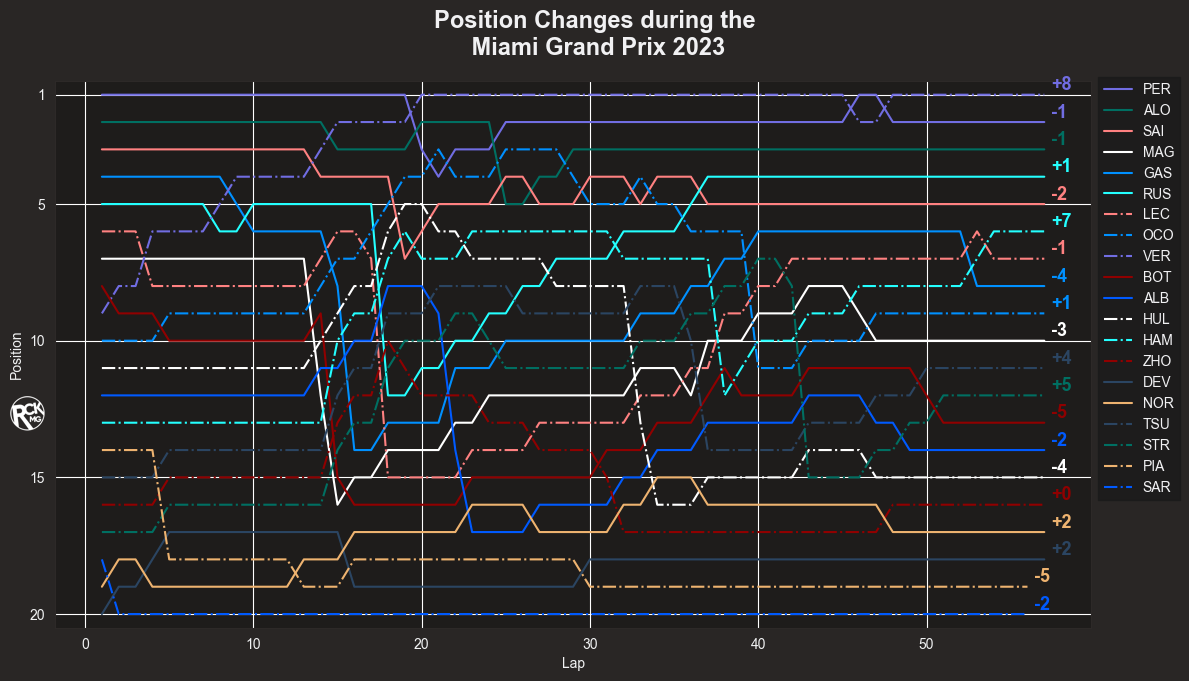

In [77]:

fig, ax = plt.subplots(figsize=plot_size)

team_colors = {}
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]

    line_style = '-'  # default line style
    driver_color = None

    for prev_drv in session.drivers[:session.drivers.index(drv)]:
        if are_drivers_same_team(drv, prev_drv, session):
            line_style = 'dashdot'
            driver_color = team_colors[prev_drv]
            break

    if driver_color is None:
        driver_color = fastf1.plotting.driver_color(abb)
        team_colors[drv] = driver_color

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'], linestyle=line_style, label=abb, color=driver_color)

    # Calculate the position change and annotate the plot
    start_pos = drv_laps.loc[drv_laps['LapNumber'] == 1]['Position'].values[0]
    end_pos = drv_laps.iloc[-1]['Position']
    position_change = int(start_pos - end_pos)
    ax.annotate(f'{position_change:+}', (drv_laps.iloc[-1]['LapNumber'], drv_laps.iloc[-1]['Position']),
                textcoords="offset points", xytext=(5, 7), fontsize=axis_label_font_size+3, ha='left', va='center', color=driver_color,fontweight='bold')

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap', fontsize=axis_label_font_size)
ax.set_ylabel('Position', fontsize=axis_label_font_size)
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.suptitle(plot_title, size=title_font_size, fontweight='bold')
plt.tight_layout()
add_logo()
plt.show()